In [53]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
plt.style.use('default')
plt.rcdefaults()
from statsmodels.formula.api import ols

In [54]:
data = pd.read_csv('.../data/steam_analysis_data.csv')
data.head()

,appid,name,release_date,developer,publisher,windows,mac,linux,required_age,genre,steamspy_tags,positive_ratings,negative_ratings,average_playtime,median_playtime,owners_lower_estimation,owners_upper_estimation,price_CAD,languages_sum,English,German,French,Simplified Chinese,Spanish,Russian,Japanese,Italian,Portuguese,Korean,Traditional Chinese,Polish,Turkish,Dutch,Czech,Swedish,Ukrainian,Hungarian,Arabic,Thai,Danish,Norwegian,Finnish,Romanian,Greek,Bulgarian,Vietnamese,release_year,total_ratings,rating_ratio,rating,multi_player,single_player,action,adventure,casual,indie,massively_multiplayer,rpg,racing,simulation,sports,strategy,type,owners_mid
0,60,Ricochet,2000-11-01 00:00:00+00:00,Valve,Valve,True,True,True,0,Action,Action;FPS;Multiplayer,4218,929,24,3,5000000,10000000,5.433183,9,1,1,1,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2000,5147,0.819507,78.823075,1,0,1,0,0,0,0,0,0,0,0,0,Paid,7500000
1,20,Team Fortress Classic,1999-04-01 00:00:00+00:00,Valve,Valve,True,True,True,0,Action,Action;FPS;Multiplayer,6357,979,136,20,5000000,10000000,5.433183,9,1,1,1,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1999,7336,0.866549,83.682325,1,0,1,0,0,0,0,0,0,0,0,0,Paid,7500000
2,10,Counter-Strike,2000-11-01 00:00:00+00:00,Valve,Valve,True,True,True,0,Action,Action;FPS;Multiplayer,214651,5470,7720,232,10000000,20000000,11.152323,8,1,1,1,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2000,220121,0.975150,96.313460,1,0,1,0,0,0,0,0,0,0,0,0,Paid,15000000
3,70,Half-Life,1998-11-08 00:00:00+00:00,Valve,Valve,True,True,True,0,Action,FPS;Sci-fi;1990's,85453,3070,391,168,2000000,5000000,11.152323,8,1,1,1,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1998,88523,0.965320,94.967288,1,1,1,0,0,0,0,0,0,0,0,0,Paid,3500000
4,80,Counter-Strike: Condition Zero,2004-03-01 00:00:00+00:00,Valve,Valve,True,True,True,0,Action,Action;FPS;Shooter,20911,1995,617,71,5000000,10000000,11.152323,8,1,1,1,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2004,22906,0.912905,89.067620,1,1,1,0,0,0,0,0,0,0,0,0,Paid,7500000


In [55]:
# adding the owner per ratings column
data['owner_per_ratings'] = (data['owners_lower_estimation'] / data['total_ratings']).round(2).astype(float)

# adding ravenue
data['revenue'] = (data['owners_lower_estimation'] * data['price_CAD']).round(2).astype(float)



In [56]:
data.describe()

,appid,required_age,positive_ratings,negative_ratings,average_playtime,median_playtime,owners_lower_estimation,owners_upper_estimation,price_CAD,languages_sum,English,German,French,Simplified Chinese,Spanish,Russian,Japanese,Italian,Portuguese,Korean,Traditional Chinese,Polish,Turkish,Dutch,Czech,Swedish,Ukrainian,Hungarian,Arabic,Thai,Danish,Norwegian,Finnish,Romanian,Greek,Bulgarian,Vietnamese,release_year,total_ratings,rating_ratio,rating,multi_player,single_player,action,adventure,casual,indie,massively_multiplayer,rpg,racing,simulation,sports,strategy,owners_mid,owner_per_ratings,revenue
count,4.524600e+04,45246.000000,4.524600e+04,45246.000000,45246.000000,45246.000000,4.524600e+04,4.524600e+04,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,4.524600e+04,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,45246.000000,4.524600e+04,4.524600e+04,4.524600e+04
mean,9.414924e+05,0.139217,1.556501e+03,240.896079,128.493436,111.806016,8.507979e+04,2.010052e+05,8.953223,3.553331,0.994209,0.252951,0.242320,0.224396,0.232463,0.237789,0.184502,0.168744,0.150975,0.114331,0.107347,0.097224,0.066989,0.056977,0.044203,0.038258,0.037528,0.036976,0.032555,0.031981,0.032180,0.030367,0.030478,0.027494,0.027273,0.024113,0.020797,2018.287362,1.797397e+03,0.733807,60.180396,0.206781,0.957499,0.438204,0.396676,0.412854,0.746099,0.026146,0.171794,0.038943,0.200150,0.048579,0.199973,1.430425e+05,5.210578e+02,1.082996e+06
std,4.571680e+05,1.527195,3.594992e+04,6514.850102,978.938682,1016.485782,1.209762e+06,2.868534e+06,8.754078,4.870784,0.075876,0.434708,0.428491,0.417188,0.422407,0.425734,0.387898,0.374530,0.358028,0.318216,0.309557,0.296266,0.250006,0.231802,0.205548,0.191819,0.190054,0.188704,0.177472,0.175951,0.176479,0.171598,0.171900,0.163520,0.162880,0.153401,0.142707,2.579575,4.119407e+04,0.232394,20.104087,0.405001,0.201731,0.496172,0.489213,0.492352,0.435246,0.159571,0.377206,0.193460,0.400117,0.214988,0.399985,2.037223e+06,1.044642e+04,1.033894e+07
min,1.000000e+01,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,2.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1997.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+04,0.000000e+00,0.000000e+00
25%,5.669475e+05,0.000000,6.000000e+00,2.000000,0.000000,0.000000,0.000000e+00,2.000000e+04,2.165103,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,9.000000e+00,0.611111,49.329699,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+04,0.000000e+00,0.000000e+00
50%,9.207750e+05,0.000000,2.200000e+01,7.000000,0.000000,0.000000,0.000000e+00,2.000000e+04,6.794883,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,3.100000e+01,0.787879,64.079515,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0

In [57]:
data_test = data.copy()

In [58]:
data_test = data[data['owner_per_ratings'] < 100000]

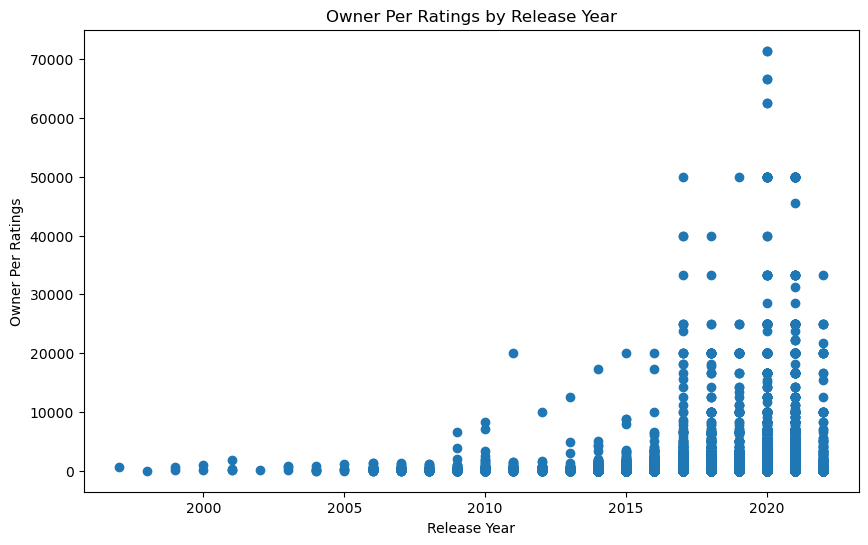

In [59]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

plt.scatter(data_test['release_year'], data_test['owner_per_ratings'])
plt.xlabel('Release Year')
plt.ylabel('Owner Per Ratings')
plt.title('Owner Per Ratings by Release Year')

plt.show()

In [60]:
#remove outliers games with more than 10,000,000
data = data[data.owners_lower_estimation <= 10000000]

In [61]:
# changing from True and False to 1 and 0
data['windows'] = data['windows'].replace({True: 1, False: 0})
data['mac'] = data['mac'].replace({True: 1, False: 0})
data['linux'] = data['linux'].replace({True: 1, False: 0})
data['paid'] = data['type'].replace({'Paid': 1, 'Free': 0})

In [62]:
#drop columns that we will not use in our model
data = data.drop(['appid', 'name', 'release_date', 'developer', 'publisher', 'genre', 'steamspy_tags', 'type'], axis=1)


In [63]:
#run full model with all variables (55 variables)
y = data['owners_lower_estimation']
X = data.drop(['owners_lower_estimation', 'owners_upper_estimation', 'owners_mid'], axis=1)
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     owners_lower_estimation   R-squared:                       0.678
Model:                                 OLS   Adj. R-squared:                  0.678
Method:                      Least Squares   F-statistic:                     1731.
Date:                     Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                             02:48:13   Log-Likelihood:            -6.2124e+05
No. Observations:                    45223   AIC:                         1.243e+06
Df Residuals:                        45167   BIC:                         1.243e+06
Df Model:                               55                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [67]:
#removing all the variables with p-value > 0.05 and runing model again
y = data['owners_lower_estimation']
X = data.drop(['owners_lower_estimation', 
               'owners_upper_estimation', 
               'owners_mid', 
               'windows', 
               'mac',
               'multi_player', 
               'languages_sum', 
               'English', 
               'French', 
               'Simplified Chinese', 
               'Spanish', 
               'Russian', 
               'Japanese', 
               'Italian', 
               'Portuguese', 
               'Korean', 
               'Traditional Chinese', 
               'Polish',
               'Dutch', 
               'Czech', 
               'Swedish', 
               'Ukrainian', 
               'Hungarian', 
               'Danish', 
               'Norwegian', 
               'Romanian', 
               'Bulgarian', 'Vietnamese', 'adventure', 'casual', 'rpg', 'racing', 'simulation', 'sports', 'strategy'], axis=1)
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     owners_lower_estimation   R-squared:                       0.678
Model:                                 OLS   Adj. R-squared:                  0.678
Method:                      Least Squares   F-statistic:                     4135.
Date:                     Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                             02:54:39   Log-Likelihood:            -6.2127e+05
No. Observations:                    45223   AIC:                         1.243e+06
Df Residuals:                        45199   BIC:                         1.243e+06
Df Model:                               23                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [68]:
#run model with Total Ratings, Paid and Release Year
y = data['owners_lower_estimation']
X = data[['total_ratings', 'paid', 'release_year']]
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     owners_lower_estimation   R-squared:                       0.601
Model:                                 OLS   Adj. R-squared:                  0.600
Method:                      Least Squares   F-statistic:                 2.266e+04
Date:                     Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                             03:19:26   Log-Likelihood:            -6.2614e+05
No. Observations:                    45223   AIC:                         1.252e+06
Df Residuals:                        45219   BIC:                         1.252e+06
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [69]:
#run model with only Total Ratings
y = data['owners_lower_estimation']
X = data['total_ratings']
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     owners_lower_estimation   R-squared:                       0.582
Model:                                 OLS   Adj. R-squared:                  0.582
Method:                      Least Squares   F-statistic:                 6.299e+04
Date:                     Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                             03:19:49   Log-Likelihood:            -6.2715e+05
No. Observations:                    45223   AIC:                         1.254e+06
Df Residuals:                        45221   BIC:                         1.254e+06
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------